# Data cleaning and exploration

DataFrames are two-dimensional labeled data structures with columns of potentially different types. The [Pandas](https://pandas.pydata.org/index.html) library is used in Python to create and work with these data structures.

The below cells import the pandas library and use this to move our data into a dataframe which can be viewed, manipulated, and combined with other data.

## Instructions

Follow the directions in any cell that does not contain code. If a cell does contain code, run this before moving on to the next cell

In [2]:
#this imports the pandas library, which is already installed in our software environment
import pandas as pd

#matplotlib is a library used for easy plotting
import matplotlib.pyplot as plt

#seaborn is another library used to make nice looking plots in Python
import seaborn as sns

In [4]:
#read in a csv file
df_planes = pd.read_csv("../data/spyplane-data/planes_features.csv")

In [6]:
#use a pandas command to look at the first few lines of data (defaults to 5, change by adding n=<number of rows>)

## Exploring Data

This section explores the plane features dataset and describes what each of the columns represents. 

In [50]:
#print list of plane feature column names

#### Background
This data comes from a news [article](https://www.buzzfeednews.com/article/peteraldhous/hidden-spy-planes) that used machine learning to identify potential spy aircraft over the continental United States. The data is available in this [Github repository](https://github.com/BuzzFeedNews/2017-08-spy-plane-finder) and the code in this notebook is based on details found [here](https://buzzfeednews.github.io/2017-08-spy-plane-finder/).

#### Data 
BuzzFeed News obtained more than four months of aircraft transponder detections from the plane tracking website Flightradar24, covering August 17 to December 31, 2015 UTC, containing all data displayed on the site within a bounding box encompassing the continental United States, Alaska, Hawaii, and Puerto Rico.

Flightradar24 receives data from its network of ground-based receivers, supplemented by a feed from ground radars provided by the Federal Aviation Administration (FAA) with a five-minute delay.

To create this dataset, Buzzfeed filtered the data to remove planes registered abroad, based on their adshex code, common commercial airliners, based on their type, and aircraft with fewer than 500 transponder detections.

They then took a random sample of 500 aircraft and calculated the following for each one:
 
- `duration` of each flight segment recorded by Flightradar24, in minutes.
- `boxes` Area of a rectangular bounding box drawn around each flight segment, in square kilometers.

The following describes each of the columns in the dataset for the remaining 19,799 aircraft:

- `adshex` Unique identifier for each aircraft, corresponding to its “Mode-S” code, in hexademical format.
- `duration1`,`duration2`,`duration3`,`duration4`,`duration5` Proportion of flight segment durations for each plane falling into each of five quantiles calculated from duration for the sample of 500 planes. The proportions for each aircraft must add up to 1; if the durations of flight segments for a plane closely matched those for a typical plane from the sample, these numbers would all approximate to 0.2; a plane that mostly flew very long flights would have large decimal fraction for duration5.
- `boxes1`,`boxes2`,`boxes3`,`boxes4`,`boxes5` Proportion of bounding box areas for each plane falling into each of five quantiles calculated from boxes for the sample of 500 planes.
- `speed1`,`speed2`,`speed3`,`speed4`,`speed5` Proportion of speed values recorded for the aircraft falling into each of five quantiles recorded for speed for the sample of 500 planes.
- `altitude1`,`altitude2`,`altitude3`,`altitude4`,`altitude5` Proportion of altitude values recorded for the aircraft falling into each of five quantiles recorded for altitude for the sample of 500 planes.
- `steer1`,`steer2`,`steer3`,`steer4`,`steer5`,`steer6`,`steer7`,`steer8` Steer was calculated as the change in compass bearing from the previous transponder detection for that aircraft; negative values indicate a turn to the left, positive values a turn to the right. These values represent the proportion of steer values for each aircraft falling into bins set manually, after observing the distribution for the sample of 500 planes, using the breaks: -180, -25, -10, -1, 0, 1, 22, 45, 180.
- `flights` Total number of flight segments for each plane.
- `squawk_1` Squawk code used most commonly by the aircraft.
- `observations` Total number of transponder detections for each plane.
- `type` Aircraft manufacter and model, if identified, else unknown.

In [52]:
#look at descriptive statistics 


____
Pandas can be used to index columns and determine counts or unique values in different columns or rows.

In [ ]:
#look at the number of rows and columns in the dataframe


In [ ]:
#add code to look at how many unique types of aircraft there are
num_plane_types = 
num_unknown_planes = 

#this will print out your calculations
print('There are ' + str(num_plane_types) + ' types of planes in this dataset and ' + 
      str(num_unknown_planes) + ' unknown plane types')

In [9]:
#seperate out a list of features
planes_short = df_planes[['duration1', 'boxes1', 'speed1', 'altitude1', 'steer1', 'flights', 
                                      'squawk_1','observations', 'type']]

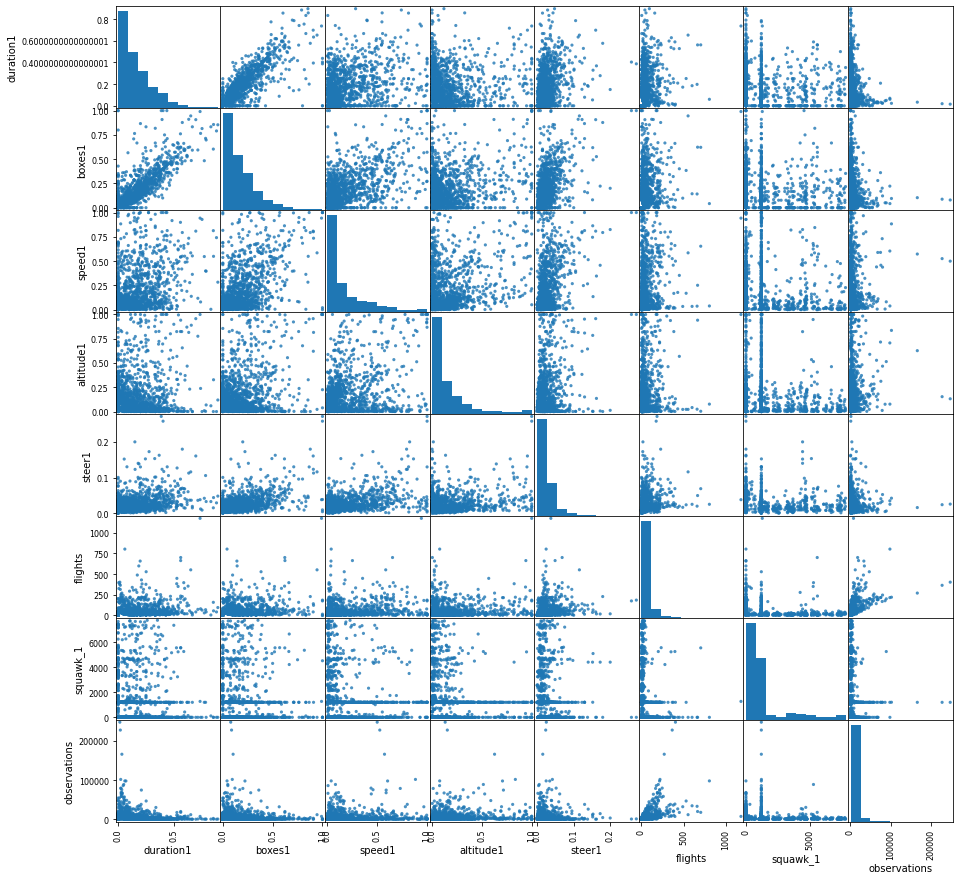

In [14]:
#Examine how features correlate with each other
pd.plotting.scatter_matrix(planes_short.sample(1500), figsize=(15,15), marker = 'o', hist_kwds = {'bins': 10}, s = 10, alpha = 0.8);
#sns.pairplot(planes_short.sample(1500));

In [ ]:
#plot a histogram of the flight segments (column name = 'flights')
# hint: https://www.w3schools.com/python/matplotlib_histograms.asp

# Stop Here
We'll continue with part two together

# Part 2:

## Outlier Detection

Here we'll look at the `flights` column, which shows how many flight segments each plane had during it's trip. We'll calculate the z-score and remove data points where the `flights` z-score is greater than 3. 

We'll first examine the descriptive statistics, then use seaborn to look at a boxplot before using the scipy and numpy packages to calculate z-score. 

In [21]:
#look at descriptive statistics for just the flight segments column
df_planes['flights'].describe()

count    19799.000000
mean        50.906864
std         76.892115
min          1.000000
25%         14.000000
50%         27.000000
75%         54.000000
max       1476.000000
Name: flights, dtype: float64

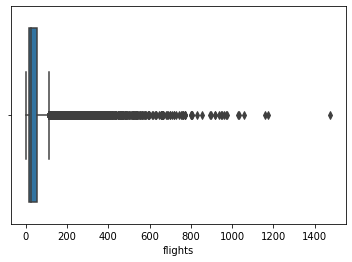

In [22]:
#use seaborn to create a boxplot of the 'flights column'
sns.boxplot(x=df_planes['flights']);

In [23]:
#print the number of flights that had more than 150 flight segments (of the 19799 planes in our dataset)
len(df_planes[df_planes['flights']>150])

1400

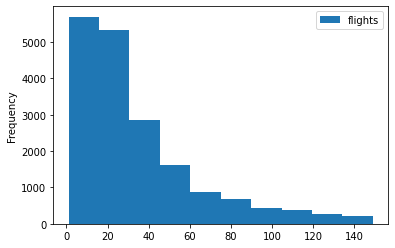

In [24]:
#plot a histogram of just the planes with flight segments less than 150
df_planes[df_planes['flights']<150].plot(y = 'flights', kind = 'hist');

In [25]:
#calculate z-scores and determine how many of the flights had flight segments with a z-score greater than 3

#packages to easily calculate z-score
from scipy import stats
import numpy as np

#calculate z-score and print number of data points outside the designated threshold (here we used 3)
z_scores = np.abs(stats.zscore(df_planes['flights']))
threshold = 3
outliers = np.where(z_scores > threshold)[0]
print('There are ' + str(outliers.size) + ' flights which have flight segments with a z-score greater than 3')

There are 404 flights which have flight segments with a z-score greater than 3


In [26]:
#print the value for flight segments that was considered the cutoff for outliers
outlier_cutoff = df_planes.loc[outliers,['flights']].min()[0]
print('The minimum number of flight segments meeting the outlier threshold for this removal method is ' + 
      str(outlier_cutoff))

The minimum number of flight segments meeting the outlier threshold for this removal method is 282


In [27]:
#remove the flight segments that are outside our z-score threshold
planes_cleaned = df_planes.drop(outliers).reset_index(drop=True)

In [28]:
#compare the size of the dataframes
print("Original dataframe size: ", df_planes.shape)
print("New dataframe size: ", planes_cleaned.shape)

Original dataframe size:  (19799, 33)
New dataframe size:  (19395, 33)


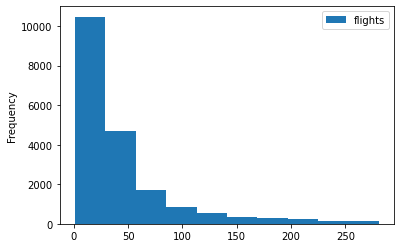

In [29]:
#plot a histogram of the 'flights' column in the new dataframe (planes_cleaned)
planes_cleaned.plot(y = 'flights', kind = 'hist');

# Part 2: Prepare our Data for Modelling

We will now prepare our data to train our machine learning algorithm. 

As training data, drawn from planes_features.csv, Buzzfeed used 97 fixed-wing FBI and DHS planes from a previous story, given a class of `surveil`, and a random sample of 500 other planes, given a class of `other`. Note that some of these random sample fall under the outliers identified in the previous step and so the final count is less than 500.

Data identifying these planes is in the file train.csv. We'll need to join this table with our plane features table so that we can seperate and label our training set. We also then need to convert our plane types into a numeric value that the classifier can use as input. 

In [30]:
#read in the training data
training_data_raw = pd.read_csv("../data/spyplane-data/train.csv")
training_data_raw.head()

,adshex,class
0,A00C4B,surveil
1,A0AB21,surveil
2,A0AE77,surveil
3,A0AE7C,surveil
4,A0C462,surveil


#### Data cleaning
Here we can look at value counts to see how many observations fall into each of the classes for training set. This is helpful to check for data entry errors and check for imbalanced classes. 

In [31]:
#look at data classes using the value_counts function
training_data_raw['class'].value_counts()

other      500
surveil     97
Name: class, dtype: int64

In [53]:
#join the training data table onto the planes_cleaned table on the 'adshex' column using an inner join

#look at a few rows of the new data table you created

####  Factorize data

Pandas has a [function to factorize data](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html). This method is useful for obtaining a numeric representation of an array when all that matters is identifying distinct values. 

You'll use this on the plane types in our labeled dataset to create a new column and then export the prepared dataset to a .csv file.  

In [46]:
#prints out the number of unique plane types
plane_types = planes_labeled['type'].nunique()
print('There are ' + str(plane_types) + ' unique plane types in this dataset')

There are 130 unique plane types in this dataset


In [54]:
#use the factorize method to create a column called 'type_factorized'


In [55]:
#display the first 15 rows of the type column and newly created type_factorized column 

In [49]:
#export data to csv
planes_labeled.to_csv("../data/spyplane-data/planes_labeled.csv", index = False)

# BREAK